<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.01-Two-Transient-Model-Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Under construction 🚧
#  Transient model examples

In [ ]:
from sympy import symbols, init_printing, Heaviside, laplace_transform, inverse_laplace_transform, plot, exp
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy
init_printing()
%matplotlib inline

## Simple vehicle dynamics

> N.B.: Part of the following material was taken from the [Control Tutorials for MATLAB and Simulink (CTMS)](https://ctms.engin.umich.edu/CTMS/index.php?example=CruiseControl&section=SystemModeling).

We consider here a simple model of the vehicle dynamics, shown in the free-body diagram (FBD) below. 

![alt](https://ctms.engin.umich.edu/CTMS/Content/CruiseControl/System/Modeling/figures/cruise_control_schematic.png)

The vehicle, of mass $m$, is acted on by a force, $u(t)$. The force $u(t)$ represents the force generated at the road/tire interface. For this simplified model we will assume that we can manipulate this force directly and will neglect the dynamics of the powertrain, tires, etc., that go into generating the force. The resistive forces, $bv(t)$, due to rolling resistance and wind drag, are assumed to vary linearly with the vehicle velocity, $v(t)$, and act in the direction opposite the vehicle's motion.

Summing forces in the x-direction and applying Newton's 2nd law, we arrive at the following system equation:

$$ m\frac{\mathrm{d}v(t)}{\mathrm{d}t} = u(t) - bv(t) $$

In terms of the time constant $\tau$, it is written as

$$ \tau\frac{\mathrm{d}v(t)}{\mathrm{d}t} = \frac{1}{b}u(t) - v(t) $$

where $ \tau = \frac{m}{b} $. Considering the vehicle at steady state for $t\le0$, we have

$$ \tau\frac{\mathrm{d}v(0)}{\mathrm{d}t} = \frac{1}{b}u(0) - v(0) $$

Subtracting the steady state equation from the dynamic one, we end up with

$$ \tau\frac{\mathrm{d}[v(t) - v(0)]}{\mathrm{d}t} = \frac{1}{b}[u(t) - u(0)] - [v(t) - v(0)] $$

which can be rewritten to

$$ \tau\frac{\mathrm{d}v'(t)}{\mathrm{d}t} = \frac{1}{b}u'(t) - v'(t) $$

by considering the definition of the following *deviation variables*

$$ v'(t) = v(t) - v(0) $$
$$ u'(t) = u(t) - u(0) $$

These *deviation variables* are simply the difference between the values of each *original variable* from their respective initial steady state value. Applying the Laplace transform in the ordinary differential equation rewritten in *deviation variables*, we have

\begin{align}
\mathcal{L}\left\{\tau\frac{\mathrm{d}v'(t)}{\mathrm{d}t}\right\} &= \mathcal{L}\{\frac{1}{b}u'(t) - v'(t)\} \\
\tau sV'(s) &= \frac{1}{b}U'(s) - V'(s) \\
\frac{V'(s)}{U'(s)} &= \frac{K_u}{\tau s + 1} \\
\end{align}

where $ K_u = \frac{1}{b} $ is the *steady state gain*.

The RHS expression is the ratio of the output *deviation variable* Laplace transform $V'(s)$ to the input *deviation variable* Laplace transform $U'(s)$ and is called *transfer function* because it transfers the dynamic variation of the input *deviation variable* to the output *deviation variable*.

To be more generic, the model should include the time varying road slope $\theta (t)$ and then we will have

$$ m\frac{\mathrm{d}v(t)}{\mathrm{d}t} = u(t) - bv(t) - mg\sin{\theta(t)} $$

This ODE is nonlinear, so after linearizing it and following the same procedure, we will end up with

\begin{align}
V'(s) &= \frac{K_u}{\tau s + 1}U'(s) +  \frac{K_\theta}{\tau s + 1}\Theta'(s)\\
\end{align}

where $ K_\theta = -\frac{mg\cos \theta(0)}{b} $

Besides that, a more realistic model should *NOT* assume that the vehicle mass $m$ is time-independent (e.g. racing cars), so assuming that it is also a function of the time we will have the following model

\begin{align}
\frac{\mathrm{d}[m(t)v(t)]}{\mathrm{d}t} &= u(t) - bv(t) - m(t)g\sin{\theta(t)}\\
\frac{\mathrm{d}m(t)}{\mathrm{d}t} &= -BSFCu(t)v(t)
\end{align}

where $BSFC$ is the vehicle [brake-specific fuel consumption](https://en.wikipedia.org/wiki/Brake-specific_fuel_consumption).

As an exercise, derive the *transfer functions* for this last nonlinear model.

Now, let's try to play a little with the `sympy`.

> N.B.: Part of the following material was taken from this [Carl Sandrock's notebook](https://colab.research.google.com/github.com/alchemyst/Dynamics-and-Control/blob/master/1_Dynamics/4_First_and_second_order_system_dynamics/First%20order%20systems.ipynb).

In [ ]:
t, K_u, tau = symbols('t, K_u, tau',real=True, positive=True)
s = symbols('s')
m = 1000 # kg
b = 50/3.6 # N/(km/h)

In [ ]:
def L(f):
    return laplace_transform(f, t, s, noconds=True)
def invL(F):
    return inverse_laplace_transform(F, s, t)

Now let us define the obtained *transfer function*:

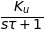

In [ ]:
G = K_u/(tau*s + 1)
G

And a unit step function (a.k.a. Heaviside function) in time domain:

In [ ]:
u = Heaviside(t)

As well its Laplace transform:

In [ ]:
U = L(u)
U

The inverse Laplace transform of a *transfer function* is its *unit impulse response*

In [ ]:
impulseresponse = invL(G)
impulseresponse

We can also plot it.

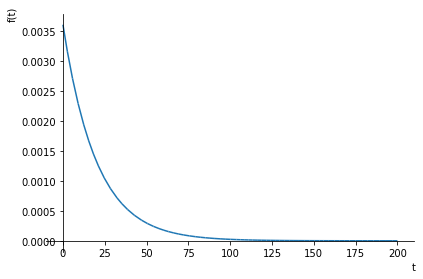

In [ ]:
plot(impulseresponse.subs(tau, m/3.6/b).subs(K_u, 1/b), (t, 0 ,10*m/3.6/b))

The vehicle is too heavy and an unit impulse can't move the vehicle to a high speed. 

Let's try increase the impulse magnitude:

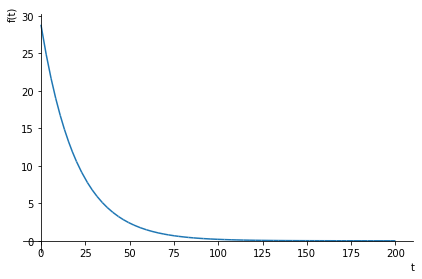

In [ ]:
plot(8000*impulseresponse.subs(tau, m/3.6/b).subs(K_u, 1/b), (t, 0 , 10*m/3.6/b))

If $u'(t)$ is a $500$ $N$ amplitude step function, $u'(s)=\frac{500}{s}$ and we can obtain the step response as follows:

In [ ]:
A = 500
stepresponse = invL(G*U*A)
stepresponse

And the plot is:

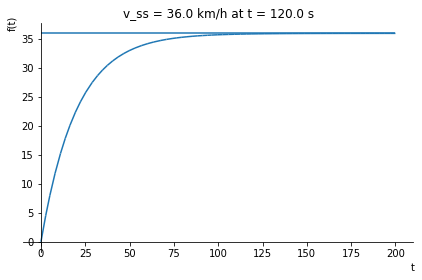

In [ ]:
plot(A/b, 
     stepresponse.subs(tau, m/3.6/b).subs(K_u, 1/b), 
     (t, 0 ,10*m/3.6/b),
     title='v_ss = {:.1f} km/h at t = {:.1f} s'.format(A/b,6*m/3.6/b))

Similarly, the ramp response can be obtained as follows:

In [ ]:
U = 1/s**2
rampresponse = invL(G*U*A/100)
rampresponse

And the plot is:

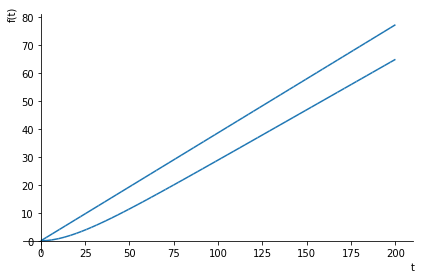

In [ ]:
plot(A*t/3.6/3.6/100, rampresponse.subs(tau, m/3.6/b).subs(K_u, 1/b), (t, 0 , 10*m/3.6/b))

Let's see what happens when the mass $m$, the coefficient of friction $b$ and the step amplitude $A$ are varied from their nominal values. 

In [ ]:
def vehicle(m=1000, b=50/3.6, A=500):
  plot(A/b,
       stepresponse.subs(tau, m/3.6/b).subs(K_u, 1/b),  
       (t, 0 ,10*m/3.6/b),
       title='v_ss = {:.1f} km/h at t = {:.1f} s'.format(A/b, 6*m/3.6/b)
       )
  
interact(vehicle, m=(0,2000), b=(10/3.6, 90/3.6))

interactive(children=(IntSlider(value=1000, description='m', max=2000), FloatSlider(value=13.88888888888889, d…

<function __main__.vehicle>

## Simple blender dynamics

In this example, we have a stirred-tank with a volume $V_1$ of 4 $m^3$ being operated with an inlet flow rate $Q$ of 0.02 $m^3 s^{-1}$ and that contains an inert species at a concentration $C_{in}$ of 1 $gmol$ $m^{-3}$.

The model equation is a continuous-flow stirred-tank without any chemical reaction:

$$ V_1\frac{\mathrm{d}C_1(t)}{\mathrm{d}t} = Q[C_{in}(t) - C_1(t)] $$

In terms of the time constant $\tau_1$, it is written as

$$ \tau_1\frac{\mathrm{d}C_1(t)}{\mathrm{d}t} = C_{in}(t) - C_1(t) $$

where $ \tau_1 = \frac{V_1}{Q} $. Considering the tank at steady state for $t\le0$, we have

$$ \tau_1\frac{\mathrm{d}C_1(0)}{\mathrm{d}t} = C_{in}(0) - C_1(0) $$

Subtracting the steady state equation from the dynamic one, we end up with

$$ \tau_1\frac{\mathrm{d}[C_1(t) - C_1(0)]}{\mathrm{d}t} = [C_{in}(t) - C_{in}(0)] - [C_1(t) - C_1(0)] $$

which can be rewritten to

$$ \tau_1\frac{\mathrm{d}C_1'(t)}{\mathrm{d}t} = C_{in}'(t) - C_1'(t) $$

by considering the definition of the following *deviation variables*

$$ C_1'(t) = C_1(t) - C_1(0) $$
$$ C_{in}'(t) = C_{in}(t) - C_{in}(0) $$

These *deviation variables* are simply the difference between the values of each *original variable* from their respective initial steady state value. Applying the Laplace transform in the ordinary differential equation rewritten in *deviation variables*, we have

\begin{align}
\mathcal{L}\left\{\tau_1\frac{\mathrm{d}C_1'(t)}{\mathrm{d}t}\right\} &= \mathcal{L}\{C_{in}'(t) - C_1'(t)\} \\
\tau_1sC_1'(s) &= C_{in}'(s) - C_1'(s) \\
\frac{C_1'(s)}{C_{in}'(s)} &= \frac{1}{\tau_1s + 1} \\
\end{align}

The RHS expression is the ratio of the output *deviation variable* Laplace transform $C_1'(s)$ to the input *deviation variable* Laplace transform $C_{in}'(s)$ and is called *transfer function* because it transfers the dynamic variation of the input *deviation variable* to the output *deviation variable*.

In [ ]:
tau1 = symbols('tau1',real=True, positive=True)
s = symbols('s')
V1 = 4
Q = 0.02

Now let us define the obtained *transfer function*:



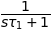

In [ ]:
G = 1/(tau1*s + 1)
G

The inverse Laplace transform of a *transfer function* is its *impulse response*

In [ ]:
impulseresponse = invL(G)
impulseresponse

We can also plot it.

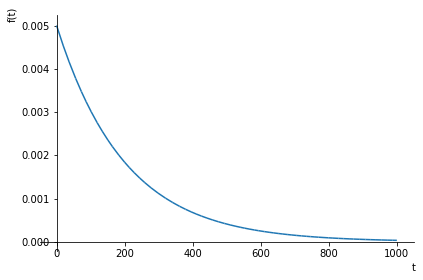

In [ ]:
plot(impulseresponse.subs(tau1, V1/Q), (t, 0 ,1000))

\If $C_{in}'(t)$ is the unit step function, $C_{in}'(s)=\frac{1}{s}$ and we can obtain the step response as follows:

In [ ]:
U = 1/s
stepresponse = invL(G*U)
stepresponse

And the plot is:

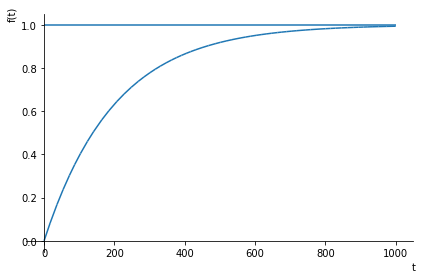

In [ ]:
plot(1, stepresponse.subs(tau1, V1/Q), (t, 0 ,1000))

Similarly, the ramp response can be obtained as follows:

In [ ]:
U = 1/s**2
rampresponse = invL(G*U)
rampresponse

And the plot is:

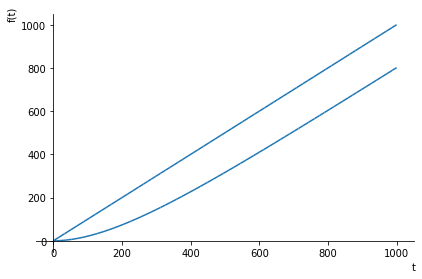

In [ ]:
plot(t, rampresponse.subs(tau1, V1/Q), (t, 0 ,1000))

Let's see what happens when the flowrate $Q$ is varied between 10% and 90% of its nominal value. 

In [ ]:
def stirtank(dQ):
  plot(1, 
       stepresponse.subs(tau1, V1/(dQ*Q/100)), 
       stepresponse.subs(tau1, V1/Q),  
       (t, 0 ,1000),
       legend=True)
  
interact(stirtank, dQ=(10.0, 190.0))

interactive(children=(FloatSlider(value=100.0, description='dQ', max=190.0, min=10.0), Output()), _dom_classes…

<function __main__.stirtank>

## Simple heater dynamics

In this example, we have a stirred-tank heater. The heat balance, in standard heat transfer notation, is:

$$ \rho C_p V\frac{\mathrm{d}T(t)}{\mathrm{d}t} = \rho C_p Q[T_{i}(t) - T(t)] + UA[T_H(t) - T(t)] $$

where $U$ is the overall heat transfer coefficient, $A$ is the heat transfer area, $\rho$ is the fluid density, $C_p$ is the heat capacity, and $V$ is the volume of the vessel. The inlet temperature $T_i(t)$ and steam-coil temperature $T_H(t)$ are functions of time and are presumably given. The initial conditions are $T(0) = T^s$, $T_i(0) = T_i^s$ and $T_H(0) = T_H^s$.

Before we go on, it should be emphasized that what we subsequently find are nothing but different algebraic manipulations of the same heat balance. First, we rearrange it to give

$$ \frac{V}{Q} \frac{\mathrm{d}T(t)}{\mathrm{d}t} = [T_{i}(t) - T(t)] + \frac{UA}{\rho C_p Q}[T_H(t) - T(t)] $$

The second step is to define $ \tau = \frac{V}{Q} $ and $ \kappa =  \frac{UA}{\rho C_p Q}$ which leads to

$$ \tau \frac{\mathrm{d}T(t)}{\mathrm{d}t} + (1 + \kappa)T(t)= T_{i}(t) + \kappa T_H(t) $$

Which is also valid at steady-state

$$ \tau \frac{\mathrm{d}T^s}{\mathrm{d}t} + (1 + \kappa)T^s = T^{s}_{i} + \kappa T^{s}_H $$

Subtracting the steady state equation from the dynamic one, we end up with

$$ \tau \frac{\mathrm{d}[T(t) - T^s]}{\mathrm{d}t} + (1 + \kappa)[T(t) - T^s] = [T_{i}(t) - T^{s}_{i}] + \kappa [T_H(t) + \kappa T^{s}_{H}] $$

which can be rewritten to

$$ \tau\frac{\mathrm{d}T'(t)}{\mathrm{d}t} + (1 + \kappa)T'(t) = T_{i}'(t) + \kappa T_H'(t) $$

by considering the definition of the following *deviation variables*

$$ T'(t) = T(t) - T^s $$
$$ T_i'(t) = T_i(t) - T^s_i $$
$$ T_H'(t) = T_H(t) - T^s_H $$

These *deviation variables* are simply the difference between the values of each *original variable* from their respective initial steady state value. Applying the Laplace transform in the ordinary differential equation rewritten in *deviation variables*, we have

\begin{align}
\mathcal{L}\left\{\tau\frac{\mathrm{d}T'(t)}{\mathrm{d}t}\right\} + \mathcal{L}\{(1 + \kappa)T'(t)\} &= \mathcal{L}\{T_{i}'(t)\} + \mathcal{L}\{\kappa T_{H}'(t)\} \\
\tau sT'(s) + (1 + \kappa)T'(s) &= T_{i}'(s) + \kappa T_{H}'(s) \\
T'(s) &= \frac{1}{\tau s + 1 + \kappa}T_{i}'(s) + \frac{\kappa}{\tau s + 1 + \kappa}T_{H}'(s) \\
T'(s) &= \frac{1/(1 + \kappa)}{\tau/(1 + \kappa) s + 1}T_{i}'(s) + \frac{\kappa/(1 + \kappa)}{\tau/(1 + \kappa) s + 1 }T_{H}'(s) \\
T'(s) &= \frac{K_i}{\tau_p s + 1}T_{i}'(s) + \frac{K_H}{\tau_p s + 1 }T_{H}'(s) \\
\end{align}

where $ \tau_p = \tau/(1 + \kappa) $, $ K_i = 1/(1 + \kappa) $ and $ K_H = \kappa/(1 + \kappa) $.

At the RHS expression we can see the ratios of the output *deviation variable* Laplace transform $T'(s)$ to each of the input *deviation variables* Laplace transforms $T_{i}'(s)$ and $T_{H}'(s)$. These ratios are called *transfer functions* because they transfer the dynamic variation of the respective input *deviation variable* to the output *deviation variable*.

Now let us define the first *transfer function*:

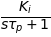

In [ ]:
tau_p = symbols('tau_p',real=True, positive=True)
K_i = symbols('K_i')
G = K_i/(tau_p*s + 1)
G

If $T_{i}'(t)$ is the unit step function, $T_{i}'(s)=\frac{1}{s}$ and we can obtain the step response as follows:

In [ ]:
U = 1/s
stepresponse = invL(G*U)
stepresponse


Let's see what happens when the parameters are varied between 10% and 90% of their nominal values. 

In [ ]:
UA = 0.005
rhoCp = 1
kappa = UA/(rhoCp*Q)

def heattank(dQ, dUA, drhoCp):
  dkappa = (dUA*UA/100)/(drhoCp*rhoCp*dQ*Q/10000)
  plot(1, 
       stepresponse.subs({taup: V1/(dQ*Q/100)/(1+dkappa), Ki: 1/(1+dkappa)}), 
       stepresponse.subs({taup: V1/Q/(1+kappa), Ki: 1/(1+kappa)}),  
       (t, 0 ,1000),
       legend=True)
  
interact(heattank, dQ=(10.0, 190.0), dUA=(10.0, 190.0), drhoCp=(10.0, 190.0))

interactive(children=(FloatSlider(value=100.0, description='dQ', max=190.0, min=10.0), FloatSlider(value=100.0…

<function __main__.heattank>

## Inverted pendulum



> N.B.: Part of the following material was taken from the [Control Tutorials for MATLAB and Simulink (CTMS)](https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=SystemModeling).


The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature (see this [video]()). Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

In this case we will consider a two-dimensional problem where the pendulum is constrained to move in the vertical plane shown in the figure below. 

![alt](https://ctms.engin.umich.edu/CTMS/Content/InvertedPendulum/System/Modeling/figures/pendulum.png)

For this system, the control input is the force $F$ that moves the cart horizontally and the outputs are the angular position of the pendulum $\theta$ and the horizontal position of the cart $x$.

For this example, let's assume the following quantities:

In [ ]:
M = 0.5      # mass of the cart [kg]
m = 0.2      # mass of the pendulum [kg]
b = 0.1      # coefficient of friction for cart [N/m/sec]
l = 0.3      # length to pendulum center of mass [m]
I = 0.006    # mass moment of inertia of the pendulum [kg.m^2]
g = 9.8      # earth's gravitational constant [m/s2]

Below are the free-body diagrams of the two elements of the inverted pendulum system.

![alt](https://ctms.engin.umich.edu/CTMS/Content/InvertedPendulum/System/Modeling/figures/pendulum2.png)

Summing the forces in the free-body diagram of the cart in the horizontal direction, you get the following equation of motion.

(1)$$ M\ddot{x}+b\dot{x}+N = F $$

Note that you can also sum the forces in the vertical direction for the cart, but no useful information would be gained.

Summing the forces in the free-body diagram of the pendulum in the horizontal direction, you get the following expression for the reaction force $N$.

(2)$$ N= m\ddot{x}+ml\ddot{\theta}\cos\theta-ml\dot{\theta}^2\sin\theta $$

If you substitute this equation into the first equation, you get one of the two governing equations for this system.

(3)$$(M+m)\ddot{x}+b\dot{x}+ml\ddot{\theta}\cos\theta-ml\dot{\theta}^2\sin\theta=F $$

To get the second equation of motion for this system, sum the forces perpendicular to the pendulum. Solving the system along this axis greatly simplifies the mathematics. You should get the following equation.

(4)$$P\sin\theta+N\cos\theta-mg\sin\theta=ml\ddot{\theta}+m\ddot{x}\cos\theta$$

To get rid of the $P$ and $N$ terms in the equation above, sum the moments about the centroid of the pendulum to get the following equation.

(5)$$-Pl\sin\theta-Nl\cos\theta=I\ddot{\theta}$$

Combining these last two expressions, you get the second governing equation.

(6)$$(I+ml^2)\ddot{\theta}+mgl\sin\theta=-ml\ddot{x}\cos\theta $$

Since we are using a Laplace transform based method for analysis, this set of equations needs to be linearized. Specifically, we will linearize the equations about the vertically upward equillibrium position, $\theta$ = $\pi$, and will assume that the system stays within a small neighborhood of this equillbrium. This assumption should be reasonably valid since under control we desire that the pendulum not deviate more than 20 degrees from the vertically upward position. Let $\phi$ represent the deviation of the pedulum's position from equilibrium, that is, $\theta$ = $\pi$ + $\phi$. Again presuming a small deviation ($\phi$) from equilibrium, we can use the following small angle approximations of the nonlinear functions in our system equations:

(7)$$ \cos \theta = \cos(\pi + \phi) \approx -1 $$

(8)$$ \sin \theta = \sin(\pi + \phi) \approx -\phi $$

(9)$$ \dot{\theta}^2 =  \dot{\phi}^2 \approx 0 $$

After substiting the above approximations into our nonlinear governing equations, we arrive at the two linearized equations of motion. Note $u$ has been substituted for the input $F$.

(10)$$ (I+ml^2)\ddot{\phi}-mgl\phi=ml\ddot{x} $$

(11)$$ (M+m)\ddot{x}+b\dot{x}-ml\ddot{\phi}=u $$

To obtain the transfer functions of the linearized system equations, we must first take the Laplace transform of the system equations assuming zero initial conditions. The resulting Laplace transforms are shown below.

(12)$$(I+ml^2)\Phi(s)s^2-mgl\Phi(s)=mlX(s)s^2$$

(13)$$(M+m)X(s)s^2+bX(s)s-ml\Phi(s)s^2=U(s)$$

Recall that a *transfer function* represents the relationship between a single input and a single output at a time. To find our first transfer function for the output $\Phi(s)$ and an input of $U(s)$ we need to eliminate $X(s)$ from the above equations. Solve the first equation for $X(s)$.

(14)$$ X(s)=\left[{\frac{I+ml^2}{ml}-\frac{g}{s^2}}\right]\Phi(s) $$

Then substitute the above into the second equation.

(15)$$(M+m)\left[\frac{I+ml^2}{ml}-\frac{g}{s^2}\right]\Phi(s)s^2+b\left[\frac{I+ml^2}{ml}-\frac{g}{s^2}\right]\Phi(s)s-ml\Phi(s)s^2=U(s)$$

Rearranging, the transfer function is then the following

(16)$$\frac{\Phi(s)}{U(s)}=\frac{\frac{ml}{q}s^2}{s^4+\frac{b(I+ml^2)}{q}s^3-\frac{(M+m)mgl}{q}s^2-\frac{bmgl}{q}s}$$

where,

(17)$$q=[(M+m)(I+ml^2)-(ml)^2]$$

From the transfer function above it can be seen that there is both a pole and a zero at the origin. These can be canceled and the transfer function becomes the following.

(18)$$P_{pend}(s) = \frac{\Phi(s)}{U(s)}=\frac{\frac{ml}{q}s}{s^3+\frac{b(I+ml^2)}{q}s^2-\frac{(M+m)mgl}{q}s-\frac{bmgl}{q}} \qquad [ \frac{rad}{N}]$$

Second, the transfer function with the cart position $X(s)$ as the output can be derived in a similar manner to arrive at the following.

(19)$$P_{cart}(s) = \frac{X(s)}{U(s)} = \frac{ \frac{ (I+ml^2)s^2 - gml } {q}
}{s^4+\frac{b(I+ml^2)}{q}s^3-\frac{(M+m)mgl}{q}s^2-\frac{bmgl}{q}s}
\qquad [ \frac{m}{N}] $$

We can represent the *transfer functions* derived above for the inverted pendulum system here employing the following commands.

In [ ]:
q = (M+m)*(I+m*l**2)-(m*l)**2

P_cart = (((I+m*l**2)/q)*s**2 - (m*g*l/q))/(s**4 + (b*(I + m*l**2))*s**3/q - ((M + m)*m*g*l)*s**2/q - b*m*g*l*s/q)

P_pend = (m*l*s/q)/(s**3 + (b*(I + m*l**2))*s**2/q - ((M + m)*m*g*l)*s/q - b*m*g*l/q)

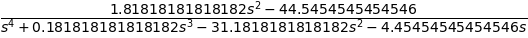

In [ ]:
P_cart

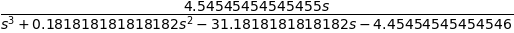

In [ ]:
P_pend